In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Description
Task 1: Student Score Prediction
 
 Description:
 
* Dataset (Recommended): Student Performance Factors (Kaggle)
* Build a model to predict students' exam scores based on their study hours
* Perform data cleaning and basic visualization to understand the dataset
* Split the dataset into training and testing sets
* Train a linear regression model to estimate final scores
* Visualize predictions and evaluate model performance

 Tools & Libraries:
 Python
 Pandas
 Matplotlib
 Scikit-learn
 
 Covered Topics: 
 Regression |  Evaluation metrics
 
 Bonus:
 Try polynomial regression and compare performance. 
Try experimenting with different feature combinations (e.g., removing or adding features like sleep, participation, etc.)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset

In [2]:
df = pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (6607, 20)

Columns: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']

Missing Values:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level  

# Basic Data Cleaning

In [4]:
# Drop rows with missing Exam_Score
# (You can use imputation instead if many missing)
df = df.dropna(subset=["Exam_Score"])

In [5]:
# Fill numeric columns with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

In [6]:
# Encode categorical columns if any
categorical_cols = df.select_dtypes(include=["object"]).columns

In [7]:
# Convert categorical columns using one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Data Visualization

## Scatter Plot

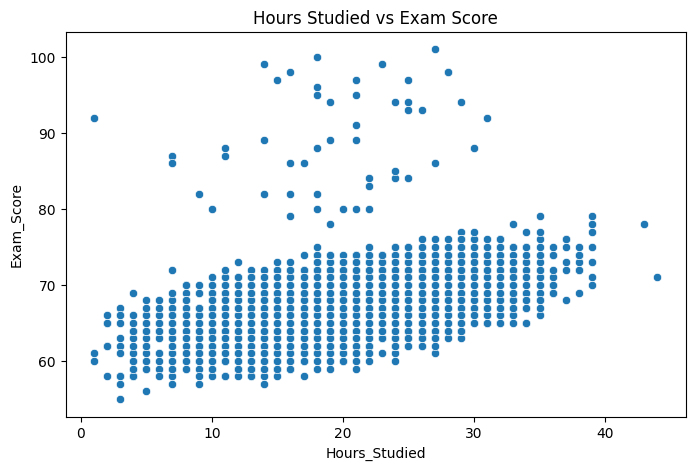

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Hours_Studied", y="Exam_Score")
plt.title("Hours Studied vs Exam Score")
plt.show()

## Heatmap

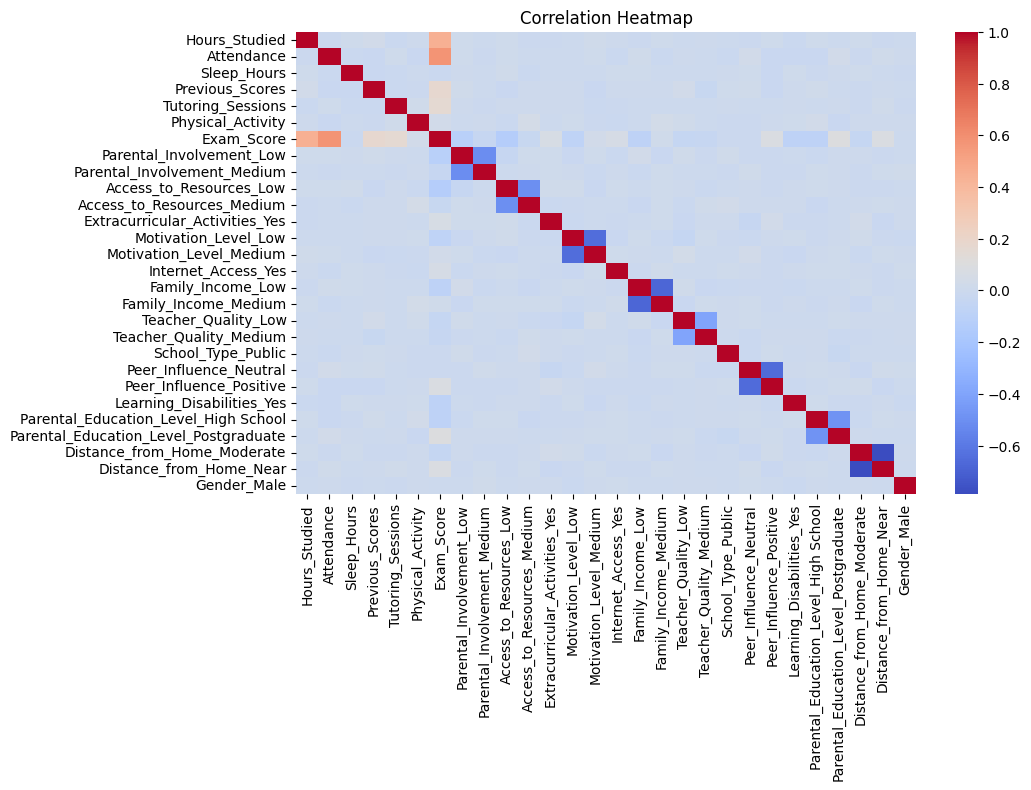

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Feature Selection

In [10]:
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

# Train-Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

##  Evaluation

In [13]:
print("Linear Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Linear Regression Results:
MSE: 3.256695866435405
R2 Score: 0.7696017567194432


## Plot Predictions

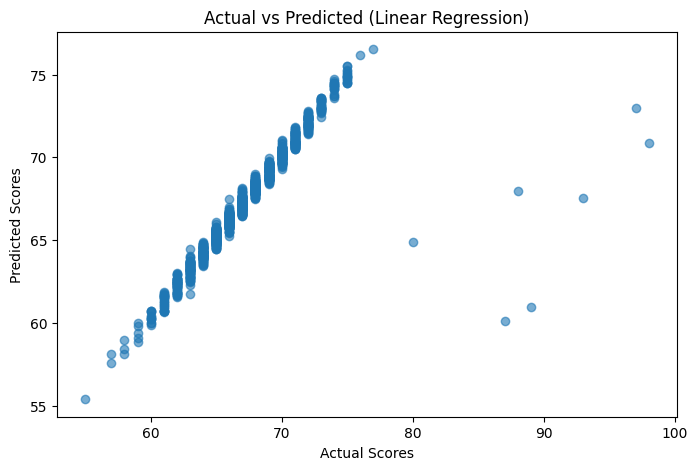

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

# Polynomial Regression (Bonus)

In [15]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [16]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_p, y_train_p)

# Predictions
y_poly_pred = poly_reg.predict(X_test_p)

## Evaluation

In [17]:
print("\nPolynomial Regression Results:")
print("MSE:", mean_squared_error(y_test_p, y_poly_pred))
print("R2 Score:", r2_score(y_test_p, y_poly_pred))


Polynomial Regression Results:
MSE: 3.5713183991957838
R2 Score: 0.7473434673926562


## Plot Predictions

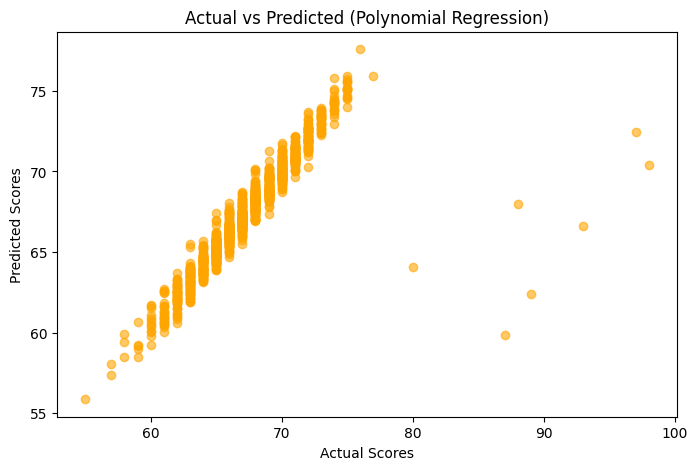

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(y_test_p, y_poly_pred, alpha=0.6, color="orange")
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted (Polynomial Regression)")
plt.show()